## 20250312


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:,2:4]
y = iris.target

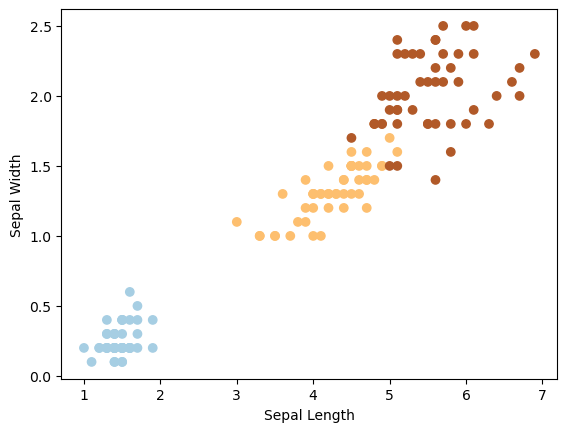

In [3]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=22)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [7]:
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

In [8]:
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_train,y_train_pred)
test_acc = accuracy_score(y_test,y_test_pred)
print('训练集准确率:%.2f%%'%(train_acc*100))
print('测试集准确率:%.2f%%'%(test_acc*100))

训练集准确率:97.50%
测试集准确率:90.00%


In [9]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train,y_train)
clf_train_pred = clf.predict(x_train)
clf_test_pred = clf.predict(x_test)

train_acc = accuracy_score(y_train,clf_train_pred)
test_acc = accuracy_score(y_test,clf_test_pred)
print('训练集准确率:%.2f%%'%(train_acc*100))
print('测试集准确率:%.2f%%'%(test_acc*100))

训练集准确率:95.83%
测试集准确率:96.67%


## 20250319 

In [10]:
#加载数据集
iris = datasets.load_iris()
X = iris.data[:,2:4]
y = iris.target

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=666)
from sklearn.neighbors import KNeighborsClassifier
k=3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_train,y_train_pred)
test_acc = accuracy_score(y_test,y_test_pred)
print('训练集准确率:%.2f%%'%(train_acc*100))
print('测试集准确率:%.2f%%'%(test_acc*100))

训练集准确率:97.14%
测试集准确率:100.00%


In [18]:
def plot_boundary(model,axis):
    x0,x1=np.meshgrid(
        np.linspace(axis[0]-0.2,axis[1]+0.2,int((axis[1]-axis[0])*100)),
        np.linspace(axis[2]-0.2,axis[3]+0.2,int((axis[3]-axis[2])*100))
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)

In [ ]:
min_1,max_1 = X[:,0].min(),X[:,0].max()
min_2,max_2 = X[:,1].min(),X[:,1].max()
plot_boundary(knn,axis=[min_1,max_1, min_2,max_2])
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,y_train)
clf_train_pred = clf.predict(X_train)
clf_test_pred = clf.predict(X_test)

clf_train_acc = accuracy_score(y_train,clf_train_pred)
clf_test_acc = accuracy_score(y_test,clf_test_pred)
print('训练集准确率:%.2f%%'%(clf_train_acc*100))
print('测试集准确率:%.2f%%'%(clf_test_acc*100))

In [ ]:
min_1,max_1 = X[:,0].min(),X[:,0].max()
min_2,max_2 = X[:,1].min(),X[:,1].max()
plot_boundary(clf,axis=[min_1,max_1, min_2,max_2])
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

## 20250402

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data_x = np.array([2,3,4,5,6]).reshape(-1,1)
data_y = np.array([2.2,3.8,4.5,6.5,7.0]).reshape(-1,1)

linear = LinearRegression()
linear.fit(data_x,data_y)

plt.scatter(data_x,data_y,c='r')
plt.plot(data_x,linear.predict(data_x),c='b')
plt.show()


In [ ]:
print(u'系数',linear.coef_)
print(u'截距',linear.intercept_)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

print('训练集准确率：%.2f%%'%(clf.score(X_train,y_train)*100))
print('测试集准确率：%.2f%%'%(clf.score(X_test,y_test)*100))

In [ ]:
def plt_boundary(model,axis):
    x0,x1 = np.meshgrid(
         np.linspace(axis[0]-0.2, axis[1]+0.2, int((axis[1]-axis[0])*100)),
         np.linspace(axis[2]-0.2, axis[3]+0.2, int((axis[3]-axis[2])*100))
    )
    
    X_new = np.c_[x0.ravel(),x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

In [ ]:
min_1,max_1 = X[:,0].min(), X[:,0].max()
min_2,max_2 = X[:,1].min(), X[:,1].max()

plt_boundary(clf, axis=[min_1, max_1, min_2, max_2])
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Paired)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('DecisionTree')
plt.show()

In [ ]:
boston = datasets.load_boston()
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

boston = datasets.load_boston()
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#线性回归的效果
LR = LinearRegression()
LR.fit(X_train,y_train)
print('线性回归训练集准确率：%.2f%%'%(LR.score(X_train,y_train)*100))
print('线性回归测试集准确率：%.2f%%'%(LR.score(X_test,y_test)*100))

#决策树回归的效果
DT = DecisionTreeRegressor()
DT.fit(X_train,y_train)
print('决策树回归训练集准确率：%.2f%%'%(DT.score(X_train,y_train)*100))
print('决策树回归测试集准确率：%.2f%%'%(DT.score(X_test,y_test)*100))

#KNN回归的效果
from sklearn.neighbors import KNeighborsRegressor
k = 5
KNN = KNeighborsRegressor(k)
KNN.fit(X_train, y_train)
print('KNN回归训练集准确率：%.2f%%'%(KNN.score(X_train,y_train)*100))
print('KNN回归测试集准确率：%.2f%%'%(KNN.score(X_test,y_test)*100))

In [ ]:
y_lr_pred = LR.predict(X_test)
y_dt_pred = DT.predict(X_test)
plt.plot(y_lr_pred,c='g',linewidth=2)
plt.plot(y_dt_pred,c='b',linewidth=2)
plt.plot(y_test,c='r',linewidth=2)
plt.show()

## 20250416

In [ ]:
def plot_boun(model,axis):
    x0,x1=np.meshgrid(
        np.linspace(axis[0]-0.2,axis[1]+0.2,int((axis[1]-axis[0])*100)),
        np.linspace(axis[2]-0.2,axis[3]+0.2,int((axis[3]-axis[2])*100))
    )
    
    X_new = np.c_[x0.ravel(),x1.ravel()]
    
    y_predict = model.predict(X_new)
    
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0,x1,zz,linewidth=5,cmap=custom)

In [ ]:
x_combined_std = np.vstack((X_train_std,X_test_std))
y_combine = np.hstack((y_train,y_test))

min_1, max_1 = x_combined_std[:,0].min(),x_combined_std[:,0].max()

min_2, max_2 = x_combined_std[:,1].min(),x_combined_std[:,1].max()

plot_boun(svc,axis=[min_1, max_1, min_2, max_2])
plt.scatter(x_combined_std[:,0],x_combined_std[:,1],c=y_combine,cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('SVM rbf Classification')
plt.show()

In [ ]:
plot_boun(svc_L,axis=[min_1, max_1, min_2, max_2])
plt.scatter(x_combined_std[:,0],x_combined_std[:,1],c=y_combine,cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('SVM Linear Classification')
plt.show()

In [ ]:
plot_boun(lr,axis=[min_1, max_1, min_2, max_2])
plt.scatter(x_combined_std[:,0],x_combined_std[:,1],c=y_combine,cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Log Classification')
plt.show()

## 20250507

In [ ]:
iris = datasets.load_iris()
#iris为numpy类型，其有属性分别data和target：data为150*4的矩阵，取data的所有行和第3、4列；target为150*1的列向量
#实现用X作为特征，y值作为标签
X = iris.data[:,2:4]
y = iris.target

#数据可视化
#plt.scatter第一个参数为X第一列，第二个参数为X的第二列，第三个参数c=y,  第四个参数cmap=plt.cm.Paired
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Paired)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
#使用train_test_split进行数据集的切分，随机种子为123，训练集：测试集=7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import time
#仿照今天的课程内容完成'Logistic Regression', 'Random Forest','AdaBoost','SVM','KNN'五种算法的实例化
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = AdaBoostClassifier()
clf4 = svm.SVC(C=1.0, kernel='rbf',decision_function_shape='ovr',gamma=0.01) # kernel为径向基函数
clf5 = KNeighborsClassifier(n_neighbors=5)
for clf, label in zip([clf1, clf2, clf3, clf4, clf5],
                      ['Logistic Regression', 'Random Forest','AdaBoost','SVM','KNN']):
    start = time.time()
    
    #五折交叉验证
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    
    end = time.time()
    running_time = end - start
    print("Accuracy: %0.4f (+/- %0.2f),耗时%0.2f秒。模型名称[%s]" %(scores.mean(), scores.std(), running_time, label))


In [ ]:
def plot_decision_boundary(model,axis):
    x0,x1 = np.meshgrid(
        np.linspace(axis[0]-1,axis[1]+1,int((axis[1]-axis[0])*100)),
        np.linspace(axis[2]-1,axis[3]+1,int((axis[3]-axis[2])*100))
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)

In [ ]:
#图像可视化
for clf, label in zip([clf1, clf2, clf3, clf4, clf5],
                      ['Logistic Regression', 'Random Forest','AdaBoost','SVM','KNN']):
    x_combined_std = np.vstack((X_train_std, X_test_std))
    y_combined = np.hstack((y_train, y_test))
    clf.fit(X_train_std,y_train)
    
    min_1, max_1 = x_combined_std[:,0].min(),x_combined_std[:,0].max()

    min_2, max_2 = x_combined_std[:,1].min(),x_combined_std[:,1].max()
    
    plot_decision_boundary(clf,axis=[min_1, max_1, min_2, max_2])
    plt.scatter(x_combined_std[:,0],x_combined_std[:,1],c=y_combined,cmap=plt.cm.Paired)
    plt.xlabel('petal length')
    plt.ylabel('petal width')
    plt.title('label')
    plt.tight_layout()
    plt.show()